<a href="https://colab.research.google.com/github/Deeks900/GenAIBootcamp/blob/main/PyTorch_4_Exercise_Classifier_nnLinear_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implement a binary classifier with `torch.nn.Linear`

In [1]:
import torch as pt
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline
pt.manual_seed(42);

## Start by practicing boolean operations on boolean tensors. Don't worry, there is a point to this exercise :)

In [2]:
a = pt.randn(10)
a

tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082, -0.6380,
         0.4617,  0.2674])

## Create a boolean tensor named `b` by converting the `a` tensor such that `b` holds `True` for positive values of `a` and `False` for negative and zero values of `a`
* **hint:** `b` must have the same shape as `a`

## Create another boolean tensor named `c` with values that are the opposite of `b`
* **hint:** you can use a different logical expression with the values of the `a` tensor or use the `~` operator

## Create 2 tensors that are the logical `and` as well as `or` of `b` and `c`. For each of the tensors, count the number of the `True` values in the tensor
* **hint:** in Python `&` is the logical `and` while `|` is the logical `or`

## Create a tensor named `d` by concatenating `b` and `c` using the `pt.cat` method that takes a list of tensors

## Reshape the `d` tensor to be 3 dimensional with the shape of `[5, 2, 2]` and save the result to tensor `e`

# Create a tensor `f` that contains the sum of the number of the `True` values along the last (trailing) dimension of the `e` tensor while keeping the original dimensions
* **hint:** check out the `keepdims` parameter

## Use the `squeeze` method on the tensor with the sum of the `True` values and confirm that its shape changed to 2 dimensions instead of 3

The `squeeze` method is useful when you need to reduce the dimension of a tensor that has one or more dimensions of length `1`. For example, if you have a tensor with a shape [3, 1, 4], the 2nd dimension can be `squeeze`d to `[3,4]`

## Next, get started on generating data for your spam/not-spam classification problem

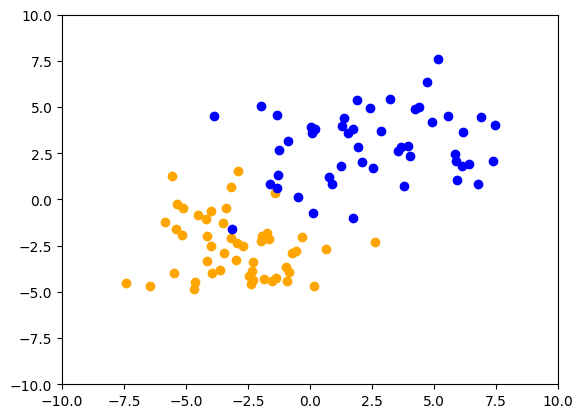

In [ ]:
NUM = 50

#X spam data points
Xs = pt.normal(0, 2, [NUM, 2]) - 3
plt.scatter(Xs[:, 0], Xs[:, 1], color = 'orange');

#X not spam data points
Xns = pt.normal(0, 3, [NUM, 2]) + 3
plt.scatter(Xns[:, 0], Xns[:, 1], color = 'blue');

plt.xlim([-10, 10])
plt.ylim([-10, 10]);

## Create a tensor array `X` with spam and not spam data values having the shape `[100, 2]`

In [ ]:
X = pt.cat([Xs, Xns])
X.shape

torch.Size([100, 2])

## Create a `y` tensor with positive/negative values for the spam/not spam data in the `X` tensor. Let's have `1` be spam, and `-1` not spam.

In [ ]:
y = pt.cat([pt.ones(NUM), -1 * pt.ones(NUM)])
y.shape

torch.Size([100])

## Create a model using `nn.Linear`. Disable the `bias` term in the model.

In [ ]:
model = nn.Linear(2, 1, bias=True)

In [ ]:
model(X[:2])

tensor([[-1.3705],
        [ 0.1241]], grad_fn=<AddmmBackward0>)

## Implement the `forward` method for the model. Don't forget to check the shape of your predictions!

In [ ]:
def forward(X):
  return model(X).squeeze()

## Implement the `loss` method to return the mean squared error of your predictions

In [ ]:
def loss(y_pred, y):
  return ((y_pred - y) ** 2).mean()

## Implement a `metric` method that takes the model predictions and the actual values and returns the accuracy (i.e. percentage correct) for the predictions.

In [ ]:
def accuracy(y_pred, y):
  return pt.sum(( ( y > 0) & (y_pred > 0)) | ( ( y < 0) & (y_pred < 0) )) / float(len(y))

In [ ]:
SAMPLE = 6
y[:SAMPLE], forward(X[:SAMPLE]), accuracy(forward(X[:SAMPLE]), y[:SAMPLE])

(tensor([1., 1., 1., 1., 1., 1.]),
 tensor([-1.3705,  0.1241, -1.7113, -1.7194, -1.6615, -1.1507],
        grad_fn=<SqueezeBackward0>),
 tensor(0.1667))

## Implement a `for` loop that does 10 iterations of gradient descent, printing out the MSE and the accurary for each iteration
* **hint:** don't forget to use `zero_grad` function with your model
* **hint:** update the weights using the `weight.data` attribute of your model

In [ ]:
EPOCHS = 100
LR = 0.01
optim = pt.optim.AdamW(model.parameters(), lr = LR)
for epoch in range(EPOCHS):
  ypred = forward(X)
  l = loss(ypred, y)
  m = accuracy(ypred, y)
  l.backward()
  print(f'epoch: {epoch}, loss: {l.item()}, accuracy: {m.item()}')
  optim.step()
  optim.zero_grad()

epoch: 0, loss: 9.467514038085938, accuracy: 0.029999999329447746
epoch: 1, loss: 9.083895683288574, accuracy: 0.029999999329447746
epoch: 2, loss: 8.708684921264648, accuracy: 0.029999999329447746
epoch: 3, loss: 8.342018127441406, accuracy: 0.029999999329447746
epoch: 4, loss: 7.98402214050293, accuracy: 0.029999999329447746
epoch: 5, loss: 7.63481330871582, accuracy: 0.029999999329447746
epoch: 6, loss: 7.294495105743408, accuracy: 0.029999999329447746
epoch: 7, loss: 6.96316385269165, accuracy: 0.029999999329447746
epoch: 8, loss: 6.640897750854492, accuracy: 0.029999999329447746
epoch: 9, loss: 6.327770233154297, accuracy: 0.029999999329447746
epoch: 10, loss: 6.023833751678467, accuracy: 0.03999999910593033
epoch: 11, loss: 5.729130744934082, accuracy: 0.03999999910593033
epoch: 12, loss: 5.443693161010742, accuracy: 0.03999999910593033
epoch: 13, loss: 5.167531967163086, accuracy: 0.05000000074505806
epoch: 14, loss: 4.900648593902588, accuracy: 0.05000000074505806
epoch: 15, lo

## Re-render the original scatter plot with spam/not spam data points and add the decision boundary line on the plot.

* **hint:** to pass tensors to `plt.plot` you need to convert them to `numpy` arrays using `.detach().numpy()`

(-10.0, 10.0)

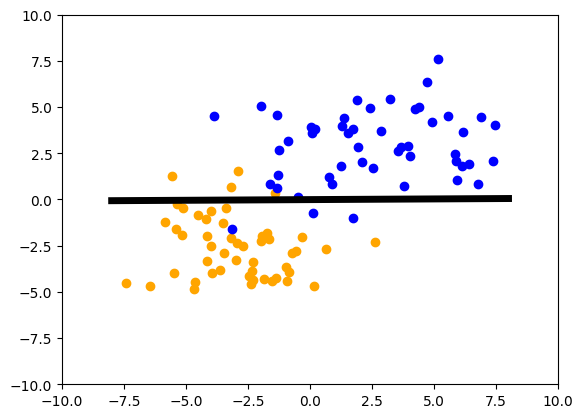

In [ ]:
plt.scatter(Xs[:, 0], Xs[:, 1], color = 'orange');
plt.scatter(Xns[:, 0], Xns[:, 1], color = 'blue');

xs = pt.linspace(-8, 8, 100).detach().numpy()
ys = model.weight.data[0,0].item() * xs + model.weight.data[0, 1].item()
plt.plot(xs, ys, color = 'black', linewidth = 5)

plt.ylim([-10, 10])
plt.xlim([-10, 10])

## Compare the weights discovered by gradient descent to the weights according to the analytical solution for the problem
* you need the formula $ (X^T X)^{-1}X^Ty $
* **hint:** use `@` for tensor multiplication